# Time Series Modeling (ARIMA Methods) Assignment

In [171]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Import the Amazon stock price data set (AMZN_data.csv) and plot a line chart with the observed daily closing prices.

In [172]:
data = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%204/AMZN_data.csv")
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [173]:
data.date = pd.to_datetime(data.date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


In [174]:
data = data[["date", "close", "open"]]
data.columns = ["Date", "Observed", "Open"]

In [175]:
data.head()

,Date,Observed,Open
0,2013-02-08,261.95,261.40
1,2013-02-11,257.21,263.20
2,2013-02-12,258.70,259.19
3,2013-02-13,269.47,261.53
4,2013-02-14,269.24,267.37


In [176]:
def ilinechart(df, x, y, groups=None, title=''):
  fig = px.line(df, x=x, y=y, color=groups, title=title, 
                template='none').update(layout=dict(title=dict(x=0.5)))

  fig.show()

In [177]:
ilinechart(data, "Date", "Observed", title="Observed Daily Closing Prices")

### Run an Autoregression (AR) model on the series and add the results to a column in the dataframe.

In [178]:
model = AR(data.Observed).fit()
data["AR"] = model.predict()

In [179]:
model.k_ar

23

### Plot a multi-line chart comparing the AR model's results with the observed values.

In [180]:
melted = pd.melt(
    data,
    id_vars="Date",
    value_vars=["Observed", "AR"],
    var_name="Variable",
    value_name="Value"
)

ilinechart(melted, "Date", "Value", groups="Variable", title="Observed v. AR")

### Run a Moving Average (MA) model on the series and add the results to a column in the dataframe.

In [181]:
model = ARMA(data.Observed, order=(0,1)).fit()
data["MA"] = model.predict()

### Print the model summary and add the model's results to the line chart with observations and the AR model results.

In [182]:
print(model.summary())

melted = pd.melt(
    data,
    id_vars="Date",
    value_vars=["Observed", "AR", "MA"],
    var_name="Variable",
    value_name="Value"
)

ilinechart(melted, "Date", "Value", groups="Variable", title="Observed v. AR v. MA")

                              ARMA Model Results                              
Dep. Variable:               Observed   No. Observations:                 1259
Model:                     ARMA(0, 1)   Log Likelihood               -8047.769
Method:                       css-mle   S.D. of innovations            144.300
Date:                Thu, 17 Dec 2020   AIC                          16101.538
Time:                        17:33:44   BIC                          16116.952
Sample:                             0   HQIC                         16107.331
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            576.9791      8.063     71.560      0.000     561.176     592.782
ma.L1.Observed     0.9834      0.004    226.363      0.000       0.975       0.992
                                    

### Run an Autoregressive Moving Average (ARMA) model on the series and add the results to a column in the dataframe.

Hint: You will need to make the time series stationary in order to run the ARMA model on it. The most common way to do this is by differncing, or subtracting the previous observed value from the current one.

In [191]:
data["Observed_Diff"] = data.Observed - data.Observed.shift(1)

In [192]:
data.Observed_Diff.isnull().mean()

0.0007942811755361397

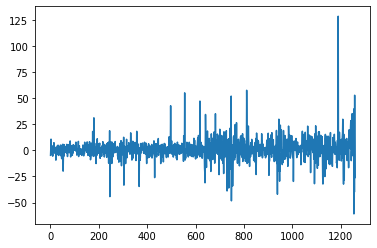

In [197]:
data.Observed_Diff.dropna().plot()

In [196]:
data.Observed_Diff

0         NaN
1       -4.74
2        1.49
3       10.77
4       -0.23
        ...  
1254   -60.89
1255    39.95
1256   -39.95
1257    52.84
1258   -26.06
Name: Observed_Diff, Length: 1259, dtype: float64

In [201]:
model = ARMA(data.Observed_Diff.dropna(), order=(2,1)).fit()
data["ARMA"] = model.predict()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



### Print the model summary and generate a multi-line chart that compares the ARMA model's results with those from the AR and MA models.

Hint: You will need to de-difference the model results by adding the previous observed values to them.

In [203]:
data["ARMA"] = data.ARMA + data.Observed

In [204]:
print(model.summary())

melted = pd.melt(
    data[2:],
    id_vars="Date",
    value_vars=["Observed", "AR", "MA", "ARMA"],
    var_name="Variable",
    value_name="Value"
)

ilinechart(melted, "Date", "Value", groups="Variable", title="Observed v. Models")

                              ARMA Model Results                              
Dep. Variable:          Observed_Diff   No. Observations:                 1258
Model:                     ARMA(2, 1)   Log Likelihood               -4733.519
Method:                       css-mle   S.D. of innovations             10.421
Date:                Thu, 17 Dec 2020   AIC                           9477.037
Time:                        17:40:49   BIC                           9502.724
Sample:                             0   HQIC                          9486.691
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9193      0.300      3.064      0.002       0.331       1.507
ar.L1.Observed_Diff    -0.4441      0.311     -1.430      0.153      -1.053       0.165
ar.L2.Observed_D

### Run an Autoregressive Integrated Moving Average (ARIMA) model on the series and add the results to a column in the dataframe.

In [210]:
model = ARIMA(data.Observed, order=(2,1,1)).fit()
data["ARIMA"] = model.predict(typ="levels")

### Print the model summary and generate a multi-line chart that compares the ARIMA model's results to the observed values.

In [211]:
print(model.summary())

melted = pd.melt(
    data[2:],
    id_vars="Date",
    value_vars=["Observed", "AR", "MA", "ARMA", "ARIMA"],
    var_name="Variable",
    value_name="Value"
)

ilinechart(melted, "Date", "Value", groups="Variable", title="Observed v. Models")

                             ARIMA Model Results                              
Dep. Variable:             D.Observed   No. Observations:                 1258
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -4733.519
Method:                       css-mle   S.D. of innovations             10.421
Date:                Thu, 17 Dec 2020   AIC                           9477.037
Time:                        17:44:33   BIC                           9502.724
Sample:                             1   HQIC                          9486.691
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9193      0.300      3.064      0.002       0.331       1.507
ar.L1.D.Observed    -0.4441      0.311     -1.430      0.153      -1.053       0.165
ar.L2.D.Observed     0.0379 

### Run an Seasonal Autoregressive Integrated Moving Average (SARIMA) model on the series and add the results to a column in the dataframe.

In [212]:
model = SARIMAX(data.Observed, order=(2,1,1), seasonal_order=(1,1,1,1)).fit()
data["SARIMA"] = model.predict()

### Print the model summary and generate a multi-line chart that compares the SARMA model's results with the observed values.

In [214]:
print(model.summary())

melted = pd.melt(
    data,
    id_vars="Date",
    value_vars=["Observed", "AR", "MA", "ARMA", "ARIMA", "SARIMA"],
    var_name="Variable",
    value_name="Value"
)

ilinechart(melted, "Date", "Value", groups="Variable", title="Observed v. Models")

                                 Statespace Model Results                                
Dep. Variable:                          Observed   No. Observations:                 1259
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 1)   Log Likelihood               -4730.914
Date:                           Thu, 17 Dec 2020   AIC                           9473.828
Time:                                   17:44:52   BIC                           9504.646
Sample:                                        0   HQIC                          9485.410
                                          - 1259                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1923    186.911      0.001      0.999    -366.147     366.532
ar.L2          0.1205     49.388      0.002

### Run an Seasonal Autoregressive Integrated Moving Average with Exogenous Factors (SARIMAX) model on the series and add the results to a column in the dataframe.

Use the daily Open prices as the exogenous factors.

In [215]:
model = SARIMAX(data.Observed, exog=data.Open, order=(2,1,1), seasonal_order=(0,0,0,0)).fit()
data["SARIMAX"] = model.predict()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



### Print the model summary and generate a multi-line chart that compares the SARMAX model's results with the SARIMA model's values.

In [216]:
print(model.summary())

melted = pd.melt(
    data,
    id_vars="Date",
    value_vars=["Observed", "AR", "MA", "ARMA", "ARIMA", "SARIMA", "SARIMAX"],
    var_name="Variable",
    value_name="Value"
)

ilinechart(melted, "Date", "Value", groups="Variable", title="Observed v. Models")

                           Statespace Model Results                           
Dep. Variable:               Observed   No. Observations:                 1259
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -4450.702
Date:                Thu, 17 Dec 2020   AIC                           8911.404
Time:                        17:45:06   BIC                           8937.090
Sample:                             0   HQIC                          8921.057
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.9996      0.001   1680.281      0.000       0.998       1.001
ar.L1          0.0103      0.015      0.707      0.480      -0.018       0.039
ar.L2         -0.0555      0.017     -3.185      0.0

### Evaluate the performance of all the models and compare to each other, using Mean Absolute Error and Root Mean Squared Error as your evaluation metrics.

In [217]:
import numpy as np
models = ['AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA', 'SARIMAX']

for model in models:
    diff = data.Observed - data[model]
    mae = diff.abs().mean()
    rmse = np.sqrt(np.mean(diff**2))
    print(f'Model {model} - MAE: {mae}   RMSE: {rmse}')

Model AR - MAE: 6.636754781948539   RMSE: 10.39904085160622
Model MA - MAE: 124.57766603584766   RMSE: 144.6307251244663
Model ARMA - MAE: 0.9453864151808589   RMSE: 1.0347819675073533
Model ARIMA - MAE: 6.607692043974701   RMSE: 10.42361312951189
Model SARIMA - MAE: 6.89713531405091   RMSE: 13.321477227153188
Model SARIMAX - MAE: 5.551568373728805   RMSE: 8.305114568444885


Best model is ARMA due to having the lower mean absolute error and root mean square error.